# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Introduction

The aim is to evaluate the use of CNN's in image recognition and the affect of adding multiple layers.

# Imports 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf
from sklearn.utils import shuffle
from numpy import load
from numpy import asarray
from numpy import save

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [2]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

#image_index = 1 # pick a specific image
#image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


# Shuffle data to ensure not ordered

In [3]:
images = shuffle(images, random_state=0)
label_fine, label_coarse = shuffle(label_fine, label_coarse, random_state=0) #make sure the samples are not ordered


test_images = shuffle(test_images, random_state=0)
test_label_fine, test_label_coarse = shuffle(test_label_fine, test_label_coarse, random_state=0)

# CNN

In [4]:
images_reshaped = np.transpose(images, (3, 0, 1, 2))[:, :, :, -1]
images_reshaped = np.expand_dims(images_reshaped, axis=3)

print(images_reshaped.shape)

(50000, 32, 32, 1)


In [5]:
test_images_reshaped = np.transpose(test_images, (3, 0, 1, 2))[:, :, :, -1]
test_images_reshaped = np.expand_dims(test_images_reshaped, axis=3)

print(test_images_reshaped.shape)

(10000, 32, 32, 1)


# Normalise the data, for each image do a hog, add how to array, train images

TypeError: Invalid shape (50000, 32, 32) for image data

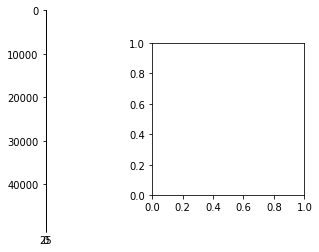

In [7]:

train_images_normalised = []

try:
    data = load('hog_array_train.npy')
    print(data)
except FileNotFoundError: 
    for image_index in range(0, 100):
        image = images_reshaped[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)

        plt.figure()
        plt.subplot(121)
        plt.imshow(hog_image)
        plt.subplot(122)
        plt.imshow(image)
        plt.suptitle(f'Extracted HOG features from image number: {image_index}\nFine Class: {label_fine[image_index]}, Coarse Class: {label_coarse[image_index]}')
        plt.show(block=False)

        print(hog_image)
        train_images_normalised.append(hog_image)
        #test_images_normalised[image_index] = hog_image

        print(train_images_normalised[image_index])

        train_images_output = np.array(train_images_normalised)


        # save numpy array as npy file


    data = asarray(train_images_output)
        # save to npy file
    save('hog_array_train.npy', data)
    

normalise test data

In [ ]:

test_images_normalised = []


try:
    
    data = load('hog_array_test.npy')

    print(data)
except: 
    for image_index in range(0, 100):
        image = test_images_reshaped[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)

        plt.figure()
        plt.subplot(121)
        plt.imshow(hog_image)
        plt.subplot(122)
        plt.imshow(image)
        plt.suptitle(f'Extracted HOG features from image number: {image_index}\nFine Class: {label_fine[image_index]}, Coarse Class: {label_coarse[image_index]}')
        plt.show(block=False)

        print(hog_image)
        test_images_normalised.append(hog_image)
        #test_images_normalised[image_index] = hog_image

        print(test_images_normalised[image_index])

        train_images_output = np.array(test_images_normalised)


        # save numpy array as npy file


    data = asarray(train_images_output)
        # save to npy file
    save('hog_array_test.npy', data)

In [ ]:
print(test_images_normalised)

Normalise the data, for each image do a hog, add how to array


In [ ]:
print(train_images_normalised)

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, -1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Check the Data cardinality

In [ ]:
print(test_images_normalised.shape)

In [ ]:
print(train_images_normalised.shape)
print(test_images_normalised.shape)

#train_images_normalised = np.array(train_images_normalised).reshape(50000, -1, 32, 32)
#test_images_normalised = np.array(test_images_normalised).reshape(10000, -1, 32, 32)

#train_images_normalised = train_images_normalised[:, 0, :, :]
test_images_normalised = test_images_normalised[:, 0, :, :]

train_images_normalised = np.transpose(train_images_normalised, (1, 2, 0))
test_images_normalised = np.transpose(test_images_normalised, (1, 2, 0))

print(train_images_normalised.shape)
print(test_images_normalised.shape)


print(label_fine.shape)
print(test_label_fine.shape)

In [ ]:
#check number of unique  labels in coarse dtaaset
#number of labels

output_num_fine = (np.unique(label_fine).shape[0])
print(output_num_fine)

output_num_coarse = (np.unique(label_coarse).shape[0])
print(output_num_coarse)

In [ ]:
xTrn, xTst, yTrn, yTst = train_test_split(train_images_normalised, label_coarse, test_size=0.2)

In [ ]:
model.add(tf.keras.layers.Flatten()) #dense layers can oinly have 1d so flattern araray to one dimension
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_num_coarse, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xTrn, yTrn, epochs=10, 
                    validation_data=(xTst, yTst))

### Plot models traing curves 

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_normalised,  label_fine_normalised, verbose=2)

print(test_acc)

In [ ]:
score = model.evaluate(test_images_normalised, test_label_fine_normalised, verbose=0)
print(score)